In [1]:
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       

prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    stock.get(string)
    price = stock
    print(price)
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                         open      high       low     close   volume  \
2017-08-14 21:45:00  159.4792  159.6300  158.7700  159.0900  1400128   
2017-08-14 22:00:00  159.1000  159.3800  158.9000  159.2650  1009525   
2017-08-14 22:15:00  159.2700  159.7300  159.2050  159.2200  1104813   
2017-08-14 22:30:00  159.2152  159.4353  159.2150  159.2600   546638   
2017-08-14 22:45:00  159.2600  159.5300  159.2600  159.4350   556516   
2017-08-14 23:00:00  159.4400  159.6000  159.3200  159.5040   562634   
2017-08-14 23:15:00  159.5000  159.5067  159.2100  159.3000   478202   
2017-08-14 23:30:00  159.2950  159.5000  159.1500  159.4646   537703   
2017-08-14 23:45:00  159.4800  159.5000  159.2500  159.2700   338905   
2017-08-15 00:00:00  159.2700  159.3800  159.2000  159.3200   372649   
2017-08-15 00:15:00  159.3200  159.4200  159.1300  159.1400   353429   
2017-08-15 00:30:00  159.1499  159.3100  159.0800  159.1576   278415   
2017-08-15 00:45:00  159.1600  159.2500  159.0500  159.2000   31

                          open       high        low      close  volume  \
2017-08-14 21:45:00   978.5300   981.9200   977.6600   977.6900  165739   
2017-08-14 22:00:00   977.9500   980.0000   976.1900   978.9990  153670   
2017-08-14 22:15:00   978.8280   980.5000   978.7052   979.9000   90104   
2017-08-14 22:30:00   979.9999   984.4900   979.9999   983.6200  151838   
2017-08-14 22:45:00   983.5491   984.3690   983.0000   983.6700   91582   
2017-08-14 23:00:00   983.8100   985.5000   983.5100   983.9400   94056   
2017-08-14 23:15:00   983.7439   984.2000   983.0901   983.9850   30618   
2017-08-14 23:30:00   984.3800   984.3800   981.6800   982.7900   84051   
2017-08-14 23:45:00   982.9700   983.7400   981.7800   981.8700   45156   
2017-08-15 00:00:00   982.0800   982.3900   980.6300   981.7600   55806   
2017-08-15 00:15:00   981.7200   983.0000   981.4200   982.4400   61109   
2017-08-15 00:30:00   982.8100   982.8600   981.3900   981.7600   54881   
2017-08-15 00:45:00   981

                         open      high       low     close   volume  \
2017-12-20 22:30:00  118.6600  118.7100  118.6600  118.7000    43248   
2017-12-20 22:45:00  118.9500  119.1200  117.5600  117.8200    69261   
2017-12-20 23:00:00  117.8200  118.3200  117.7700  118.2300   163492   
2017-12-20 23:15:00  118.2200  118.4200  118.0900  118.1800    49993   
2017-12-20 23:30:00  118.1800  118.2452  118.0600  118.2400    40796   
2017-12-20 23:45:00  118.2400  118.2500  118.0000  118.1000    43877   
2017-12-21 00:00:00  118.1300  118.2400  118.0500  118.1200    41672   
2017-12-21 00:15:00  118.1101  118.2100  118.0600  118.0600    32619   
2017-12-21 00:30:00  118.0874  118.1400  117.9200  118.0899    28223   
2017-12-21 00:45:00  118.0900  118.0900  117.9300  118.0500    31569   
2017-12-21 01:00:00  118.0500  118.1700  117.9900  118.0050    28177   
2017-12-21 01:15:00  118.0108  118.0900  117.9000  118.0000    87431   
2017-12-21 01:30:00  117.9850  118.1000  117.9850  118.0200    4

                          open       high        low      close  volume  \
2017-08-14 21:45:00   940.1200   941.0400   936.8300   937.5400   58321   
2017-08-14 22:00:00   937.5400   937.9700   934.4850   936.5900   54367   
2017-08-14 22:15:00   936.9849   939.0600   936.8000   937.5300   37324   
2017-08-14 22:30:00   937.8700   938.9900   937.7100   938.2600   18197   
2017-08-14 22:45:00   938.4700   939.0320   938.2500   939.0320   18797   
2017-08-14 23:00:00   939.1026   940.6400   938.6600   938.9400   23105   
2017-08-14 23:15:00   938.7200   939.1804   937.2528   937.5100   22796   
2017-08-14 23:30:00   937.4700   938.4800   936.3500   938.0600   17757   
2017-08-14 23:45:00   938.1600   939.4000   938.0300   938.0300   20762   
2017-08-15 00:00:00   938.5400   939.4800   938.4037   939.3700   15615   
2017-08-15 00:15:00   939.1890   939.9500   939.0900   939.2050   15381   
2017-08-15 00:30:00   939.2500   939.8000   938.6945   938.6945   13825   
2017-08-15 00:45:00   938

                         open      high       low     close   volume  \
2017-08-14 21:45:00   73.2400   73.5400   73.1300   73.4100  1251715   
2017-08-14 22:00:00   73.4200   73.4600   73.2307   73.3200   706012   
2017-08-14 22:15:00   73.3250   73.5400   73.3201   73.3700   805056   
2017-08-14 22:30:00   73.3700   73.4800   73.3650   73.4443   449097   
2017-08-14 22:45:00   73.4400   73.6400   73.4100   73.6290   621930   
2017-08-14 23:00:00   73.6300   73.6700   73.5300   73.5301   499810   
2017-08-14 23:15:00   73.5300   73.6100   73.5200   73.6037   367909   
2017-08-14 23:30:00   73.6050   73.6100   73.4900   73.5613   416377   
2017-08-14 23:45:00   73.5650   73.6000   73.5200   73.5300   404542   
2017-08-15 00:00:00   73.5400   73.5700   73.4700   73.5000   375838   
2017-08-15 00:15:00   73.5000   73.5800   73.4800   73.5600   316364   
2017-08-15 00:30:00   73.5600   73.6000   73.5200   73.5300   274514   
2017-08-15 00:45:00   73.5350   73.5500   73.4900   73.5400   26

                         open      high       low     close   volume  \
2017-08-14 21:45:00  169.7600  169.9800  169.5500  169.6600   546188   
2017-08-14 22:00:00  169.6798  169.9500  169.2900  169.8800   651483   
2017-08-14 22:15:00  169.8850  170.4900  169.8850  170.2600   870655   
2017-08-14 22:30:00  170.2600  170.9700  170.2600  170.5900   774877   
2017-08-14 22:45:00  170.5900  170.8852  170.5000  170.7200   462831   
2017-08-14 23:00:00  170.7250  170.9600  170.5900  170.6200   475164   
2017-08-14 23:15:00  170.6300  170.8000  170.5100  170.7900   267672   
2017-08-14 23:30:00  170.7800  170.7881  170.3400  170.6100   299146   
2017-08-14 23:45:00  170.6200  170.7400  170.2700  170.3100   279571   
2017-08-15 00:00:00  170.2700  170.4600  170.2300  170.3600   323025   
2017-08-15 00:15:00  170.3666  170.5099  170.2900  170.3400   250392   
2017-08-15 00:30:00  170.3400  170.6000  170.3300  170.4780   189451   
2017-08-15 00:45:00  170.4900  170.5600  170.2400  170.5500   21

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  36.1150  36.2200  36.0900  36.2000   388611     36.20000   
2017-08-14 22:00:00  36.2000  36.2600  36.1750  36.1850   661223     36.19250   
2017-08-14 22:15:00  36.1850  36.2800  36.1500  36.2650   571555     36.22500   
2017-08-14 22:30:00  36.2650  36.3400  36.2500  36.2993   544363     36.28215   
2017-08-14 22:45:00  36.2913  36.3200  36.2550  36.3100   334575     36.30465   
2017-08-14 23:00:00  36.3050  36.3250  36.2200  36.2250   594007     36.26750   
2017-08-14 23:15:00  36.2250  36.2250  36.1400  36.1600   882204     36.19250   
2017-08-14 23:30:00  36.1600  36.2400  36.1300  36.2250   504769     36.19250   
2017-08-14 23:45:00  36.2300  36.3100  36.2300  36.3050   280559     36.26500   
2017-08-15 00:00:00  36.3050  36.3600  36.3000  36.3550   405562     36.33000   
2017-08-15 00:15:00  36.3600  36.4300  36.3500  36.4050   742210     36.38000   
2017-08-15 00:30:00  36.4050

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  31.6900  31.7700  31.6700  31.7650   586194     31.76500   
2017-08-14 22:00:00  31.7700  31.8300  31.7400  31.7700  1059200     31.76750   
2017-08-14 22:15:00  31.7700  31.8300  31.7500  31.8000   731919     31.78500   
2017-08-14 22:30:00  31.8000  31.8700  31.8000  31.8700   535278     31.83500   
2017-08-14 22:45:00  31.8700  31.8900  31.8100  31.8408  1123609     31.85540   
2017-08-14 23:00:00  31.8500  31.8800  31.8430  31.8500   332124     31.84540   
2017-08-14 23:15:00  31.8500  31.8800  31.8300  31.8700   423440     31.86000   
2017-08-14 23:30:00  31.8650  31.8700  31.8100  31.8550   596005     31.86250   
2017-08-14 23:45:00  31.8550  31.8600  31.7800  31.7910   498125     31.82300   
2017-08-15 00:00:00  31.7950  31.8100  31.7600  31.7650   505012     31.77800   
2017-08-15 00:15:00  31.7650  31.8100  31.7600  31.7950   696789     31.78000   
2017-08-15 00:30:00  31.7900

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  41.5300  41.6700  41.4950  41.6700   410176     41.67000   
2017-08-14 22:00:00  41.6700  41.7100  41.6000  41.6750   507186     41.67250   
2017-08-14 22:15:00  41.6800  41.7950  41.6100  41.6600   564393     41.66750   
2017-08-14 22:30:00  41.6600  41.7563  41.6500  41.7450   338237     41.70250   
2017-08-14 22:45:00  41.7500  41.8350  41.7450  41.8200   372063     41.78250   
2017-08-14 23:00:00  41.8300  41.9100  41.8000  41.8300   345577     41.82500   
2017-08-14 23:15:00  41.8350  41.8500  41.6800  41.6800   616747     41.75500   
2017-08-14 23:30:00  41.6800  41.6950  41.5700  41.6100   337072     41.64500   
2017-08-14 23:45:00  41.6100  41.6400  41.5600  41.5850   336676     41.59750   
2017-08-15 00:00:00  41.5850  41.6500  41.5500  41.6300   423217     41.60750   
2017-08-15 00:15:00  41.6390  41.7550  41.6200  41.7500   327471     41.69000   
2017-08-15 00:30:00  41.7450

                         open      high       low     close   volume  \
2017-08-14 21:45:00  160.4700  161.7400  160.2700  160.8900  1675393   
2017-08-14 22:00:00  160.9000  162.0700  160.6000  161.2400  1909191   
2017-08-14 22:15:00  161.2400  162.4500  161.0300  161.9310  1479158   
2017-08-14 22:30:00  161.9600  162.6900  161.7710  162.1478  1187131   
2017-08-14 22:45:00  162.1600  162.4700  161.7500  161.8800   781932   
2017-08-14 23:00:00  161.8900  162.4900  161.7000  161.8720   997672   
2017-08-14 23:15:00  161.8900  163.3600  161.8900  163.3236  1052889   
2017-08-14 23:30:00  163.3133  164.0900  162.9500  164.0768  1176159   
2017-08-14 23:45:00  164.0600  164.3500  163.7600  163.8650   882143   
2017-08-15 00:00:00  163.8400  164.7000  163.6800  164.4015   964533   
2017-08-15 00:15:00  164.4051  165.2200  164.0600  165.0000  1289616   
2017-08-15 00:30:00  164.9600  165.5000  164.7100  165.1477  1000995   
2017-08-15 00:45:00  165.1548  165.8100  165.0410  165.2810   95

                         open      high       low     close   volume  \
2017-08-14 21:45:00  170.7255  171.2900  169.7200  170.2400   397982   
2017-08-14 22:00:00  170.1500  170.3200  169.1600  169.5731   401288   
2017-08-14 22:15:00  169.6200  169.7600  168.8000  169.0150   475729   
2017-08-14 22:30:00  169.0000  170.5000  168.9500  169.9480   506537   
2017-08-14 22:45:00  169.9999  171.4400  169.9800  171.2786   380495   
2017-08-14 23:00:00  171.2800  172.4500  171.2780  171.2900   428698   
2017-08-14 23:15:00  171.2600  171.4400  170.7600  171.0350   282036   
2017-08-14 23:30:00  170.9950  171.1600  170.8000  171.0700   126353   
2017-08-14 23:45:00  171.0800  171.3500  170.3100  170.3600   186056   
2017-08-15 00:00:00  170.3300  170.6000  169.8900  170.0604   196438   
2017-08-15 00:15:00  170.0660  170.1400  169.6100  169.8000   186358   
2017-08-15 00:30:00  169.8199  170.3200  169.8199  170.0500   149169   
2017-08-15 00:45:00  170.0773  170.2900  169.9500  170.2568   11

                          open       high        low      close  volume  \
2018-02-27 22:30:00  1884.0000  1884.0000  1884.0000  1884.0000    3311   
2018-02-27 22:45:00  1870.0200  1919.0000  1870.0200  1904.2000    9567   
2018-02-27 23:00:00  1902.2450  1912.2650  1896.8650  1897.9900   21868   
2018-02-27 23:15:00  1902.8100  1903.0100  1892.9200  1892.9200   12981   
2018-02-27 23:30:00  1892.9300  1897.0000  1892.7550  1895.5500    9370   
2018-02-27 23:45:00  1895.4600  1907.8900  1894.3450  1901.8500   10115   
2018-02-28 00:00:00  1902.2100  1907.7600  1896.4850  1903.7000    7035   
2018-02-28 00:15:00  1905.7100  1905.7100  1899.6800  1900.5100    8788   
2018-02-28 00:30:00  1903.2399  1903.2399  1894.5100  1897.0100    4718   
2018-02-28 00:45:00  1900.0000  1903.0800  1896.5000  1900.4000    5424   
2018-02-28 01:00:00  1900.2300  1902.4700  1899.4100  1900.0000    6926   
2018-02-28 01:15:00  1900.4200  1902.9100  1899.7200  1900.4400    7972   
2018-02-28 01:30:00  1899

                         open      high       low     close  volume  \
2017-08-14 21:45:00  148.0000  148.4700  147.9100  148.2900   37870   
2017-08-14 22:00:00  148.3500  148.6300  148.1301  148.4700   32722   
2017-08-14 22:15:00  148.4475  148.9500  148.3400  148.7259   20428   
2017-08-14 22:30:00  148.7072  149.0500  148.6200  148.8150   25535   
2017-08-14 22:45:00  148.8500  149.0500  148.6700  148.8900   20850   
2017-08-14 23:00:00  148.9300  149.1400  148.8600  148.8600   19725   
2017-08-14 23:15:00  148.8200  149.2300  148.7900  149.1400   32766   
2017-08-14 23:30:00  149.1900  149.1900  148.7850  148.8200   41365   
2017-08-14 23:45:00  148.8500  149.0900  148.7100  148.7700   16851   
2017-08-15 00:00:00  148.8100  149.0700  148.7300  149.0700   16278   
2017-08-15 00:15:00  149.0500  149.2200  148.9400  149.1048   20958   
2017-08-15 00:30:00  149.1300  149.2050  148.9900  149.1104   18798   
2017-08-15 00:45:00  149.0950  149.1887  148.9100  149.0960   19508   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00  171.2100  171.3300  170.3220  170.9700   44676   
2017-08-14 22:00:00  170.8700  170.9700  170.5300  170.5850   38303   
2017-08-14 22:15:00  170.5850  170.8900  170.5500  170.7380   44732   
2017-08-14 22:30:00  170.8090  170.9300  170.6700  170.8250   44691   
2017-08-14 22:45:00  170.7600  170.9400  170.7100  170.7900   29700   
2017-08-14 23:00:00  170.7850  171.5650  170.7850  171.2400   49386   
2017-08-14 23:15:00  171.1900  171.2600  171.0100  171.2500   54961   
2017-08-14 23:30:00  171.2500  171.2900  170.9800  170.9800   38673   
2017-08-14 23:45:00  171.0000  171.2200  170.9800  171.1601   38082   
2017-08-15 00:00:00  171.1950  171.5500  171.1500  171.5000   42141   
2017-08-15 00:15:00  171.5300  171.7900  171.4600  171.4900   46899   
2017-08-15 00:30:00  171.4910  171.5100  171.3300  171.3500   29374   
2017-08-15 00:45:00  171.3500  171.5400  171.2800  171.4800   24331   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00   81.6700   81.8700   81.4400   81.6300  179201   
2017-08-14 22:00:00   81.5600   82.1600   81.5000   82.0800  233166   
2017-08-14 22:15:00   82.0900   82.1200   81.9800   82.0000  257140   
2017-08-14 22:30:00   82.0000   82.0100   81.7600   81.7700  138358   
2017-08-14 22:45:00   81.7500   81.9200   81.7000   81.8900  111531   
2017-08-14 23:00:00   81.8900   82.0800   81.8300   81.8400   39896   
2017-08-14 23:15:00   81.8200   81.8800   81.7600   81.8194   43219   
2017-08-14 23:30:00   81.8014   81.8100   81.6900   81.7700   35348   
2017-08-14 23:45:00   81.7800   81.8900   81.7700   81.8900   32595   
2017-08-15 00:00:00   81.8800   81.9900   81.8500   81.9800   49701   
2017-08-15 00:15:00   81.9800   82.1000   81.9700   82.0400   67118   
2017-08-15 00:30:00   82.0400   82.0500   81.9350   82.0016   40810   
2017-08-15 00:45:00   81.9800   82.0200   81.9000   81.9000   76765   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00  248.3800  249.5300  247.7500  249.3000   77962   
2017-08-14 22:00:00  249.4750  249.7900  248.2650  248.6400   79848   
2017-08-14 22:15:00  248.6100  249.1200  248.1800  248.3900   30229   
2017-08-14 22:30:00  248.4100  249.0500  248.2750  248.4900   35025   
2017-08-14 22:45:00  248.5600  249.3700  248.5600  249.2900   24834   
2017-08-14 23:00:00  249.2950  249.7500  249.2800  249.2900   22580   
2017-08-14 23:15:00  249.2400  249.5000  248.8900  249.3900   29748   
2017-08-14 23:30:00  249.3900  249.5100  249.1200  249.2700   26019   
2017-08-14 23:45:00  249.2700  249.4800  249.2206  249.4100   17355   
2017-08-15 00:00:00  249.3700  249.9900  249.2700  249.9700   25523   
2017-08-15 00:15:00  249.9800  250.2300  249.9200  249.9200   32227   
2017-08-15 00:30:00  249.9000  250.0100  249.6900  249.7300   27682   
2017-08-15 00:45:00  249.7500  249.8400  249.5700  249.7100   12445   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  58.5300  58.7400  58.3400  58.3900   209690     58.39000   
2017-08-14 22:00:00  58.3800  58.5800  58.2710  58.5800   273044     58.48500   
2017-08-14 22:15:00  58.5700  58.6100  58.4900  58.5000   143189     58.54000   
2017-08-14 22:30:00  58.5000  58.6300  58.5000  58.5100   182256     58.50500   
2017-08-14 22:45:00  58.5100  58.6200  58.5000  58.6000   164427     58.55500   
2017-08-14 23:00:00  58.6000  58.7300  58.6000  58.6900   164614     58.64500   
2017-08-14 23:15:00  58.6800  58.7000  58.5950  58.6450   204223     58.66750   
2017-08-14 23:30:00  58.6450  58.6450  58.4600  58.6200   171995     58.63250   
2017-08-14 23:45:00  58.6300  58.7400  58.5900  58.6300   182997     58.62500   
2017-08-15 00:00:00  58.6400  58.7200  58.6200  58.7100    76354     58.67000   
2017-08-15 00:15:00  58.7000  58.8050  58.6700  58.7750   135634     58.74250   
2017-08-15 00:30:00  58.7750

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  72.8600  73.1150  72.7000  72.8300   135423     72.83000   
2017-08-14 22:00:00  72.8400  72.9100  72.6800  72.7650   170384     72.79750   
2017-08-14 22:15:00  72.7700  72.9200  72.7000  72.8700   209481     72.81750   
2017-08-14 22:30:00  72.8700  72.9780  72.7100  72.7400   155507     72.80500   
2017-08-14 22:45:00  72.7500  72.8600  72.6764  72.7600   163185     72.75000   
2017-08-14 23:00:00  72.7600  72.8700  72.7300  72.8000   166355     72.78000   
2017-08-14 23:15:00  72.7963  72.8000  72.7000  72.7400   166219     72.77000   
2017-08-14 23:30:00  72.7400  72.7500  72.5800  72.6000   215497     72.67000   
2017-08-14 23:45:00  72.5900  72.7600  72.5600  72.7100   126324     72.65500   
2017-08-15 00:00:00  72.7170  72.7900  72.7000  72.7900    91946     72.75000   
2017-08-15 00:15:00  72.7900  72.8551  72.6801  72.6900   131069     72.74000   
2017-08-15 00:30:00  72.6900

                         open      high       low     close  volume  \
2017-08-14 21:45:00  156.6700  157.2800  156.6500  156.8000   38868   
2017-08-14 22:00:00  156.8600  157.5250  156.8050  157.5200   55472   
2017-08-14 22:15:00  157.4500  157.6500  157.2650  157.3500   62948   
2017-08-14 22:30:00  157.3400  157.4700  157.0700  157.1200   66737   
2017-08-14 22:45:00  157.1200  157.4200  156.9400  157.4200   38421   
2017-08-14 23:00:00  157.4400  157.6800  157.4000  157.6100   26049   
2017-08-14 23:15:00  157.6130  157.8600  157.5950  157.8400   52373   
2017-08-14 23:30:00  157.8600  158.1000  157.7800  157.9500   69844   
2017-08-14 23:45:00  157.9700  158.0000  157.7200  157.7700   38791   
2017-08-15 00:00:00  157.7700  157.9600  157.7400  157.9200   36619   
2017-08-15 00:15:00  157.9018  157.9700  157.8500  157.9001   27773   
2017-08-15 00:30:00  157.9000  157.9800  157.8000  157.8200   22273   
2017-08-15 00:45:00  157.8100  157.9785  157.7900  157.9500   30213   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  53.1238  53.1600  52.9600  53.1050   191419     53.10500   
2017-08-14 22:00:00  53.1000  53.3400  53.0500  53.2200   379900     53.16250   
2017-08-14 22:15:00  53.2100  53.2300  53.0500  53.1627   272923     53.19135   
2017-08-14 22:30:00  53.1700  53.2400  53.1700  53.1800    96247     53.17135   
2017-08-14 22:45:00  53.1900  53.2500  53.1408  53.2450   160357     53.21250   
2017-08-14 23:00:00  53.2500  53.3800  53.2450  53.3168   334748     53.28090   
2017-08-14 23:15:00  53.3100  53.3100  53.1948  53.1948   238756     53.25580   
2017-08-14 23:30:00  53.1943  53.2071  53.0900  53.0900   188437     53.14240   
2017-08-14 23:45:00  53.1000  53.2445  53.1000  53.2145   187598     53.15225   
2017-08-15 00:00:00  53.2141  53.2400  53.1800  53.1833   167851     53.19890   
2017-08-15 00:15:00  53.1900  53.3500  53.1850  53.3500   121320     53.26665   
2017-08-15 00:30:00  53.3500

In [3]:

def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled

def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    print(sum(yt)/len(yt))              
    return xt,yt
                    


Working on... AAPL


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.42334494773519166
0.4793814432989691
0.5066889632107023
0.5
0.4568345323741007
--------------
0.5886792452830188
0.524390243902439
0.44501718213058417
0.4882943143812709
0.520

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5077821011673151
0.5292207792207793
0.44136807817589574
0.5
0.5757042253521126
0.4639344262295082
--------------
0.5330739299610895
0.538961038961039
0.41368078175895767
0.5667701863354038
0.5352112676056338
0.5065573770491804
--------------
0.42996108949416345
0.5227272727272727
0.48697068403908794
0.46273291925465837
0.5088028169014085
0.5311475409836065
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5357142857142857
0.44462540716612375
0.5108695652173914
0.5316901408450704
0.5229508196721312
--------------
0.

--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.508833922261484
0.558
0.36490683229813664
0.5470430107526881
0.5
0.7420494699646644
--------------
0.4840989399293286
0.566
0.35403726708074534
0.7459677419354839
0.5018587360594795
0.8109540636042403
--------------
0.5
0.572
0.2981366459627329
0.6451612903225806
0.5669144981412639
0.7879858657243817
--------------
0.4929328621908127
0.578
0.2562111801242236
0.5268817204301075
0.6096654275092936
0.6908127208480566
--------------
0.5
0.5
0.5031055900621118
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5106007067137809
0.56
0.34937888198757766
0.5497311827956989
0.5
0.7508833922261484
--------------
0.473

0.5
0.5125523012552301
0.48442367601246106
0.66991643454039
0.539647577092511
0.7931654676258992
--------------
0.4724264705882353
0.5794979079497908
0.4392523364485981
0.584958217270195
0.6519823788546255
0.7787769784172662
--------------
0.47610294117647056
0.5794979079497908
0.3987538940809969
0.5933147632311978
0.6453744493392071
0.7571942446043165
--------------
0.5036764705882353
0.5104602510460251
0.4750778816199377
0.5194986072423399
0.5220264317180616
0.539568345323741
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.46691176470588236
0.5
0.4984423676012461
0.5487465181058496
0.5
0.670863309352518
--------------
0.4724264705882353
0.5
0.5
0.8064066852367688
0.5
0.8381294964028777
--------------
0.5
0.5104602510460251
0.49065420560747663
0.6671309192200557
0.5176211453744494
0.7787769784172662
--------------
0.5018382352941176
0.5460251046025104
0.45950155763239875
0.5487465181058496
0.65638766

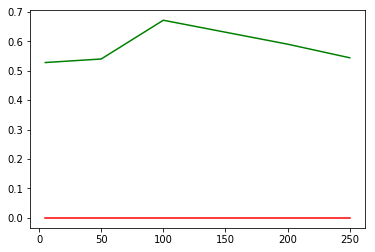

Working on... AMZN


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5656370656370656
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.47270114942528735
0.4870967741935484
0.5
0.42234848484848486
--------------
0.5207612456747405
0.5652866242038217
0.4

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5491803278688525
0.5
0.46296296296296297
0.49146757679180886
0.49134199134199136
0.496551724137931
--------------
0.5606557377049181
0.5106666666666667
0.5079365079365079
0.5187713310580204
0.5216450216450217
0.656896551724138
--------------
0.4918032786885246
0.42933333333333334
0.5
0.5
0.5043290043290043
0.6879310344827586
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5475409836065573
0.5053333333333333
0.4748677248677249
0.49829351535836175
0.5
0.5
--------------
0.49836065573770494
0.528
0.5
0.5
0.5
0.6068965517241379
--------------
0.519672131147541
0.49733333333333335
0.5211640211640212
0.5836177474402731
0.6233766233766234
0.7862068965517242
--------------
0.5524590163934426
0.4666666666666667
0.656

--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.38311688311688313
0.5
0.5
0.5
0.5
0.46184738955823296
--------------
0.3814935064935065
0.5761421319796954
0.5
0.5
0.5
0.5381526104417671
--------------
0.5
0.5964467005076142
0.4975786924939467
0.5
0.524074074074074
0.8453815261044176
--------------
0.49188311688311687
0.6269035532994924
0.549636803874092
0.5061728395061729
0.5092592592592593
0.8493975903614458
--------------
0.4935064935064935
0.5710659898477157
0.5944309927360775
0.49691358024691357
0.37407407407407406
0.6546184738955824
--------------
0.49837662337662336
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.39935064935064934
0.5
0.5
0.5
0.5
0.4598393574297189
--------------
0.38961038961038963
0.6015228426395939
0.5
0.5
0.5
0.5180722891566265
--------------
0.5
0.616751269035533
0.5
0.5
0.5
0.6646586345381527
--------------
0.46915584415584416
0.6459390862944162

0.5131004366812227
--------------
0.5
0.4975124378109453
0.5
0.5252100840336135
0.5
0.5480349344978166
--------------
0.4813753581661891
0.5062189054726368
0.4937185929648241
0.39775910364145656
0.5704225352112676
0.7161572052401747
--------------
0.4871060171919771
0.5373134328358209
0.6331658291457286
0.5560224089635855
0.5
0.6593886462882096
--------------
0.498567335243553
0.5497512437810945
0.7211055276381909
0.5336134453781513
0.551056338028169
0.5567685589519651
--------------
0.498567335243553
0.5261194029850746
0.5778894472361809
0.5658263305322129
0.4471830985915493
0.5589519650655022
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.4937810945273632
0.5
0.5364145658263305
0.5
0.5327510917030568
--------------
0.4813753581661891
0.4925373134328358
0.49874371859296485
0.47759103641456585
0.5
0.5917030567685589
--------------
0.4813753581661891
0.509950

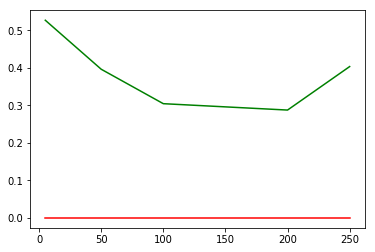

Working on... PEP
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.6164772727272727
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.6363636363636364
0.5
0.5
0.5
--------------
0.5
0.5
0.6278409090909091
0.5
0.5
0.5
--------------
0.5
0.5
0.6619318181818182
0.5
0.5
0.5
--------------
0.5
0.5
0.6960227272727273
0.5
0.5
0.5
--------------
0.5
0.5
0.6193181818181818
0.5
0.5
0.5
--------------
0.5
0.5
0.5340909090909091
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5852272727272727
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.6448863636363636
0.5
0.5
0.5
--------------
0.5
0.5
0.6392045454545454
0.5
0.5
0.5
--------------
0.5
0.5
0.6306818181818182
0.5
0.5
0.5
--------------
0.4673913043478261
0.2847222222222222
0.6676136363636364
0.5158227848101266
0.39953271028037385
0.618421052631579
--------------
0.4855072463768116
0.2743055555555556
0.627

/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-

0.5
0.5
0.5
0.5
0.0
0.9803149606299213
--------------
0.5
0.5
0.5
0.5
0.0
0.9803149606299213
--------------
0.5
0.5
0.5
0.5
0.0
0.9803149606299213
--------------
0.5
0.5
0.5
0.5
0.0
0.01968503937007874
--------------
0.5
0.5
0.5
0.5
0.0
0.01968503937007874
--------------
0.5
0.5
0.5
0.5
0.0
0.01968503937007874
--------------
0.49242424242424243
0.49635036496350365
0.46130952380952384
0.5
0.003937007874015748
0.01968503937007874
--------------
0.5265151515151515
0.4744525547445255
0.4494047619047619
0.5096153846153846
0.1732283464566929
0.17716535433070865
--------------
0.5
0.5
0.5029761904761905
0.5
0.0
0.01968503937007874
--------------
0.5
0.5
0.5
0.5
0.0
0.01968503937007874
--------------
0.5
0.5
0.5
0.5
0.0
0.01968503937007874
--------------
0.5
0.5
0.5
0.5
0.0
0.01968503937007874
--------------
0.5
0.5
0.5
0.5
0.0
0.01968503937007874
--------------
0.5
0.5
0.5
0.5
1.0
0.01968503937007874
--------------
0.5
0.5
0.5
0.5
1.0
0.01968503937007874
--------------
0.4734848484848485
0.46

/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
--------------
0.5
0.5
0.5
0.5
0.0
0.5
-

/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


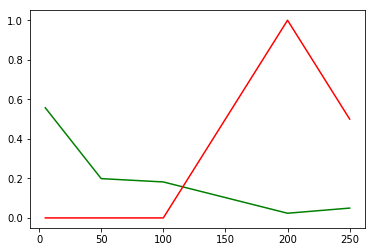

Working on... GOOGL
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.47029702970297027
0.4872881355932203
0.4483985765124555
0.5132075471698113
0.5952380952380952
0.4469178082191781
--------------
0.46864686468646866
0.375
0.45373665480427045
0.4716981132075472
0.6130952380952381
0.4537671232876712
--------------
0.4884488448844885
0.5021186440677966
0.4786476868327402
0.49433962264150944
0.5
0.4863013698630137
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0

0.4642857142857143
0.5078616352201258
0.4344569288389513
0.4275618374558304
0.5380794701986755
--------------
0.5017241379310344
0.44107142857142856
0.5141509433962265
0.5056179775280899
0.5565371024734982
0.6258278145695364
--------------
0.5258620689655172
0.44107142857142856
0.5
0.49625468164794007
0.5565371024734982
0.49503311258278143
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5620689655172414
0.4375
0.49528301886792453
0.40636704119850187
0.4275618374558304
0.5645695364238411
--------------
0.5258620689655172
0.46964285714285714
0.45125786163522014
0.4550561797752809
0.5547703180212014
0.6324503311258278
--------------
0.5086206896551724
0.48392857142857143
0.5518867924528302
0.6741573033707865
0.7120141342756183
0.543046357615894
--------------
0.5120689655172413
0.460714285

0.6666666666666666
0.6845070422535211
0.4278688524590164
0.5576131687242798
0.6194852941176471
0.5880281690140845
--------------
0.741869918699187
0.6281690140845071
0.3918032786885246
0.6440329218106996
0.6636029411764706
0.5475352112676056
--------------
0.7052845528455285
0.647887323943662
0.4557377049180328
0.5967078189300411
0.5404411764705882
0.5633802816901409
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.6016260162601627
0.6887323943661972
0.43278688524590164
0.4691358024691358
0.6176470588235294
0.602112676056338
--------------
0.6991869918699187
0.652112676056338
0.45737704918032784
0.5967078189300411
0.6047794117647058
0.5774647887323944
--------------
0.774390243902439
0.5253521126760563
0.34098360655737703
0.5905349794238683
0.6819852941176471
0.5475352112676056
--------------
0.7804878048780488
0.591549295774

0.5266666666666666
0.569327731092437
0.46511627906976744
--------------
0.5968468468468469
0.7117486338797814
0.6
0.5533333333333333
0.5903361344537815
0.49224806201550386
--------------
0.6328828828828829
0.7418032786885246
0.6107142857142858
0.5888888888888889
0.6785714285714286
0.5445736434108527
--------------
0.7004504504504504
0.5040983606557377
0.5625
0.6422222222222222
0.6617647058823529
0.5833333333333334
--------------
0.7297297297297297
0.5478142076502732
0.5357142857142857
0.6244444444444445
0.6596638655462185
0.622093023255814
--------------
0.7004504504504504
0.605191256830601
0.4160714285714286
0.6244444444444445
0.6281512605042017
0.5891472868217055
--------------
0.5
0.49453551912568305
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5968468468468469
0.6830601092896175
0.5946428571428571
0.5555555555555556
0.5903361344537815
0.4883720930232558
--------------
0.63513513

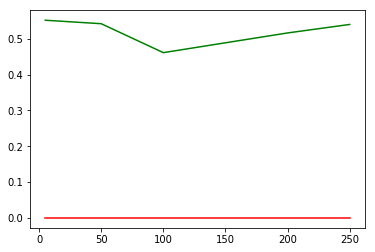

Working on... MSFT
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.4816849816849817
0.5423728813559322
0.5593525179856115
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5894039735099338
0.5
0.5
0.5
0.5
--------------
0.5
0.5827814569536424
0.5
0.5
0.5
0.5
--------------
0.5
0.5827814569536424
0.5
0.5054945054945055
0.4978813559322034
0.5107913669064749
--------------
0.60580204778157
0.5827814569536424
0.5698412698412698
0.521978021978022
0.576271186440678
0.6151079136690647
--------------
0.5802047781569966
0.5877483443708609
0.546031746031746
0.5183150183150184
0.5911016949152542
0.5755395683453237
---

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5262390670553936
0.5064935064935064
0.5608695652173913
0.5090252707581228
0.5
0.5
--------------
0.5116618075801749
0.5194805194805194
0.5159420289855072
0.4855595667870036
0.4875444839857651
0.5
--------------
0.5072886297376094
0.5324675324675324
0.5376811594202898
0.5
0.49644128113879005
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5072886297376094
0.5665584415584416
0.5565217391304348
0.5397111913357401
0.5088967971530249
0.5
---

--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5076923076923077
0.5782608695652174
0.551829268292683
0.49335548172757476
0.5355805243445693
0.5386996904024768
--------------
0.5215384615384615
0.5463768115942029
0.5060975609756098
0.521594684385382
0.5280898876404494
0.6408668730650154
--------------
0.44
0.5710144927536231
0.47865853658536583
0.4833887043189369
0.5131086142322098
0.7445820433436533
--------------
0.42923076923076925
0.5985507246376811
0.4969512195121951
0.49335548172757476
0.5
0.6609907120743034
--------------
0.5
0.5043478260869565
0.5
0.5
0.49812734082397003
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5015384615384615
0.5826086956521739
0.5746951219512195
0.49667774086378735
0.5374531835205992
0.5309597523219814
--------------
0.5323076923076923
0.5405797101449276
0.5228658536585366
0.519

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.4772727272727273
0.7665745856353591
0.5848765432098766
0.5289389067524116
0.5907079646017699
0.6022364217252396
--------------
0.4928977272727273
0.5538674033149171
0.5277777777777778
0.5836012861736335
0.5907079646017699
0.7204472843450479
--------------
0.45738636363636365
0.5317679558011049
0.5308641975308642
0.522508038585209
0.6460176991150443
0.7651757188498403
--------------
0.2684659090909091
0.4972375690607735
0.48148148148148145
0.5852090032154341
0.6327433628318584
0.7939297124600639
--------------
0.37926136363636365
0.5524861878453039
0.5231481481481481
0.5739549839228296
0.6460176991150443
0.6645367412140575
--------------
0.49857954545454547
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.4744318181818182
0.6450276243093923
0.5524691358024691
0.53054

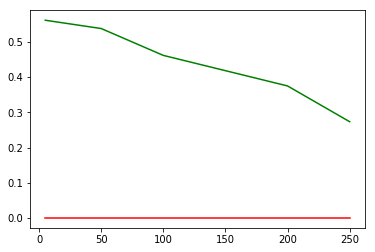

Working on... FB


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-

0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.49818840579710144
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5056603773584906
0.5058823529411764
0.493801652892562
0.5213675213675214
0.5273109243697479
0.32608695652173914
--------------
0.6150943396226415
0.5607843137254902
0.5888429752066116

0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5118243243243243
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.525390625
0.5086206896551724
0.5569852941176471
0.5
0.5152027027027027
0.5235294117647059
--------------
0.546875
0.5224137931034483
0.5863970588235294
0.510593220338983
0.5456081081081081
0.5117647058823529
--------------
0.53125
0.503448275862069
0.6268382352941176
0.4766949152542373
0.5405405405405406
0.5235294117647059
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.534
0.574235807860262
0.5806451612903226
0.5574468085106383
0.6126760563380281
0.5079872204472844
--------------
0.584
0.5545851528384279
0.6431451612903226
0.5595744680851064
0.6795774647887324
0.5
--------------
0.698
0.5087336244541485
0.655241935483871
0.5808510638297872
0.7253521126760564
0.4952076677316294
--------------
0.59
0.4868995633187773
0.6532258064516129
0.4978723404255319
0.6830985915492958
0.5
--------------
0.502
0.4978165938864629
0.5483870967741935
0.5
0.5299295774647887
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.554
0.5807860262008734
0.5685483870967742
0.551063829787234
0.6003521126760564
0.5063897763578274
--------------
0.616
0.5262008733624454
0.6411290322580645
0.5468085106

0.8076923076923077
0.57421875
0.7098214285714286
0.7059925093632958
0.6490196078431373
0.5524475524475524
--------------
0.7234432234432234
0.564453125
0.7165178571428571
0.700374531835206
0.6764705882352942
0.5541958041958042
--------------
0.6355311355311355
0.578125
0.7165178571428571
0.6273408239700374
0.6509803921568628
0.5367132867132867
--------------
0.5036630036630036
0.494140625
0.5022321428571429
0.5056179775280899
0.5411764705882353
0.5314685314685315
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.575091575091575
0.681640625
0.6071428571428571
0.5842696629213483
0.611764705882353
0.5594405594405595
--------------
0.7362637362637363
0.732421875
0.6897321428571429
0.6947565543071161
0.6431372549019608
0.5454545454545454
--------------
0.8571428571428571
0.5625
0.7053571428571429
0.7172284644194756
0.6607843137254902
0.5576923076923077
--------------
0.7765567765567766
0.560546875
0.71205357

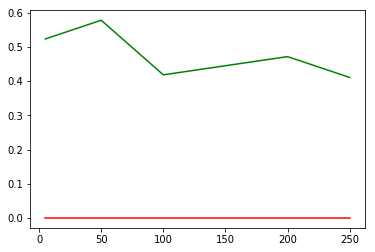

Working on... INTC
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5277777777777778
0.5
--------------
0.5
0.5
0.5
0.5
0.5277777777777778
0.5
--------------
0.5
0.5
0.5
0.5
0.5238095238095238
0.5
--------------
0.5
0.5
0.5
0.5
0.5059523809523809
0.5
--------------
0.5
0.5
0.5
0.5
0.5158730158730159
0.5
--------------
0.5
0.5
0.5
0.5
0.5277777777777778
0.5
--------------
0.5
0.5
0.5
0.5
0.49603174603174605
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.4230769230769231
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.42077464788732394
0.5936170212765958
0.5364372469635628
0.5138888888888888
0.5109090909090909
0.4307692307692308
------------

--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5037593984962406
--------------
0.44867549668874174
0.6048951048951049
0.5416666666666666
0.5112903225806451
0.5
0.5
--------------
0.4817880794701987
0.6066433566433567
0.5399305555555556
0.5016129032258064
0.5
0.5
--------------
0.46192052980132453
0.5979020979020979
0.4548611111111111
0.5064516129032258
0.5
0.5018796992481203
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.4906015037593985
--------------
0.46192052980132453
0.5979020979020979
0.5451388888888888
0.5096774193548387
0.5
0.5
----------

0.5
0.5
0.5303514376996805
0.672360248447205
0.5252525252525253
0.462406015037594
--------------
0.5061538461538462
0.5127737226277372
0.5303514376996805
0.5
0.5
0.5
--------------
0.5
0.5
0.5463258785942492
0.5015527950310559
0.5
0.5131578947368421
--------------
0.5430769230769231
0.531021897810219
0.5782747603833865
0.4813664596273292
0.5151515151515151
0.5733082706766918
--------------
0.6384615384615384
0.5109489051094891
0.5463258785942492
0.4891304347826087
0.5252525252525253
0.6428571428571429
--------------
0.5
0.5018248175182481
0.4984025559105431
0.5
0.5016835016835017
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5063897763578274
0.5046583850931677
0.5269360269360269
0.4680451127819549
--------------
0.5015384615384615
0.5054744525547445
0.5271565495207667
0.5
0.5
0.5
--------------
0.5
0.5018248175182481
0.5766773162939297
0.5015527950310559
0.5
0.5206766917293233
----------

0.5
0.5
0.5226586102719033
0.637987012987013
0.5
0.7285714285714285
--------------
0.5412698412698412
0.6129629629629629
0.6389728096676737
0.6737012987012987
0.503257328990228
0.8
--------------
0.5857142857142857
0.7351851851851852
0.5861027190332326
0.7142857142857143
0.5179153094462541
0.7693877551020408
--------------
0.5
0.5037037037037037
0.5060422960725075
0.4967532467532468
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5055555555555555
0.5196374622356495
0.5048701298701299
0.5
0.5653061224489796
--------------
0.4984126984126984
0.5407407407407407
0.5181268882175226
0.6282467532467533
0.501628664495114
0.7142857142857143
--------------
0.49523809523809526
0.5259259259259259
0.5906344410876133
0.698051948051948
0.506514657980456
0.8061224489795918
--------------
0.6031746031746031
0.7296296296296296
0.649546827794562
0.6428571428571429
0.511

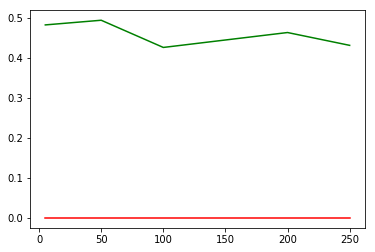

Working on... CSCO


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5420560747663551
0.5508982035928144
0.4619377162629758
0.43911439114391143
0.5456273764258555
0.4981751824817518
--------------
0.5856697819314641
0.5688622754491018
0.4515570934256055
0.44280442804428044
0.5836501901140685
0.46897810218978103
--------------
0.5872274143302181
0.5044910179640718
0.4671280276816609
0.47232472324723246
0.5380228136882129
0.4981751824817518
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5249221183800623
0.5568862275449101
0.4463667820069204
0.43911439114391143
0.526615969581749
0.48905109489051096
--------------
0.5560747663551402
0.5808383233532934
0.47923875432525953
0.4022140221402214
0.6140684410646388
0.5036496350364964
-------------

0.44363636363636366
0.5517857142857143
0.4856115107913669
--------------
0.5092592592592593
0.44609164420485176
0.46938775510204084
0.3890909090909091
0.5214285714285715
0.6079136690647482
--------------
0.6256613756613757
0.45417789757412397
0.46598639455782315
0.49636363636363634
0.5053571428571428
0.5341726618705036
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.42857142857142855
0.5
0.5
0.5
--------------
0.5211640211640212
0.5040431266846361
0.4064625850340136
0.5036363636363637
0.46785714285714286
0.5
--------------
0.5542328042328042
0.4919137466307278
0.38945578231292516
0.5618181818181818
0.5160714285714286
0.48741007194244607
--------------
0.5
0.4811320754716981
0.4098639455782313
0.3509090909090909
0.5142857142857142
0.5215827338129496
--------------
0.5066137566137566
0.48247978436657685
0.4880952380952381
0.41454545454545455
0.4964285714285

0.5177865612648221
0.7701149425287356
--------------
0.6190476190476191
0.5
0.5
0.7216981132075472
0.4723320158102767
0.6532567049808429
--------------
0.4988095238095238
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.6583333333333333
0.6220657276995305
0.4811643835616438
0.39308176100628933
0.5355731225296443
0.5019157088122606
--------------
0.55
0.7276995305164319
0.4657534246575342
0.3050314465408805
0.5434782608695652
0.6704980842911877
--------------
0.5023809523809524
0.7828638497652582
0.4811643835616438
0.3663522012578616
0.5039525691699605
0.8026819923371648
--------------
0.5035714285714286
0.7711267605633803
0.5
0.41037735849056606
0.4743083003952569
0.8103448275862069
--------------
0.5511904761904762
0.5
0.5
0.5911949685534591
0.5375494071146245
0.7413793103448276
--------------
0.5333333333333333
0.4988262910798122
0.4982876712328767
0.7264150943396226
0.47826086956

0.5
0.5
0.5
--------------
1.0
0.9932126696832579
0.5
0.5
0.5
0.5
--------------
1.0
0.9932126696832579
0.5
0.5
0.5
0.5
--------------
0.49095022624434387
0.6402714932126696
0.5337837837837838
0.5195195195195195
0.5850202429149798
0.6841004184100419
--------------
0.2149321266968326
0.8461538461538461
0.5
0.5525525525525525
0.659919028340081
0.6861924686192469
--------------
0.038461538461538464
0.8031674208144797
0.5
0.48348348348348347
0.6639676113360324
0.702928870292887
--------------
0.033936651583710405
0.916289592760181
0.5
0.5
0.5141700404858299
0.8138075313807531
--------------
0.2149321266968326
0.9932126696832579
0.5
0.7297297297297297
0.5890688259109311
0.7489539748953975
--------------
0.5633484162895928
0.9932126696832579
0.5
0.5915915915915916
0.6639676113360324
0.6569037656903766
--------------
0.997737556561086
0.9932126696832579
0.5
0.5
0.5
0.5
--------------
1.0
0.9932126696832579
0.5
0.5
0.5
0.5
--------------
1.0
0.9932126696832579
0.5
0.5
0.5
0.5
--------------
1.

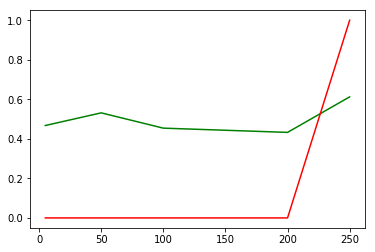

Working on... CMCSA


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.49806201550387597
0.5282258064516129
0.5588235294117647
0.5523465703971119
0.5127388535031847
0.5811965811965812
--------------
0.5096899224806202
0.5705645161290323
0.6549019607843137
0.6083032490974729
0.5334394904458599
0.5876068376068376
--------------
0.5038759689922481
0.5544354838709677
0

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.4888535031847134
0.5
0.5
--------------
0.4647887323943662
0.6051873198847262
0.5872340425531914
0.517515923566879
0.5593471810089021
0.5364806866952789
--------------
0.5035211267605634
0.6772334293948127
0.5872340425531914
0.5429936305732485
0.5415430267062314
0.5257510729613734
--------------
0.4841549295774648
0.5403458213256485
0.5148936170212766
0.5414012738853503
0.5385756676557863
0.5064377682403434
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5063694267515924
0.5
0.5
--------------
0.4612676056338028
0.6296829971181557
0.5957446808510638
0.5222929936305732
0

0.5418918918918919
0.5313807531380753
0.5675675675675675
0.6084656084656085
0.5819112627986348
--------------
0.4845505617977528
0.527027027027027
0.41631799163179917
0.7179054054054054
0.44841269841269843
0.5853242320819113
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.6306179775280899
0.5662162162162162
0.5
0.518581081081081
0.6865079365079365
0.6006825938566553
--------------
0.672752808988764
0.5432432432432432
0.5146443514644351
0.6807432432432432
0.5634920634920635
0.537542662116041
--------------
0.6137640449438202
0.5527027027027027
0.4456066945606695
0.6925675675675675
0.578042328042328
0.5870307167235495
--------------
0.5800561797752809
0.5297297297297298
0.4246861924686193
0.6841216216216216
0.4894179894179894
0.5784982935153583
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-----

0.5518987341772152
0.4915254237288136
0.6781767955801105
0.599290780141844
0.597864768683274
--------------
0.6944444444444444
0.5759493670886076
0.4385593220338983
0.7983425414364641
0.5449172576832151
0.5
--------------
0.6296296296296297
0.6063291139240506
0.4364406779661017
0.669889502762431
0.5626477541371159
0.5854092526690391
--------------
0.6349206349206349
0.5468354430379747
0.4067796610169492
0.5662983425414365
0.6146572104018913
0.6316725978647687
--------------
0.5026455026455027
0.5
0.5
0.5
0.4988179669030733
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.6044973544973545
0.5506329113924051
0.5
0.7002762430939227
0.6063829787234043
0.6138790035587188
--------------
0.7235449735449735
0.5468354430379747
0.4279661016949153
0.8259668508287292
0.5531914893617021
0.5
--------------
0.705026455026455
0.5936708860759494
0.4300847457627119
0.7444751381

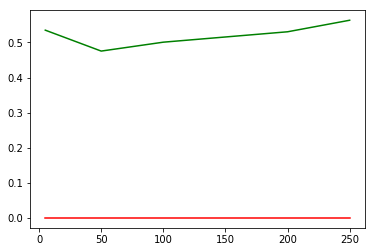

Working on... NVDA


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-

0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5708955223880597
0.5575396825396826
0.6021276595744681
--------------
0.43454545454545457
0.4984076433121019
0.5088028169014085
0.5373134328358209
0.5634920634920635
0.6127659574468085
--------------
0.5054545454545455
0.5
0.5
0.5
0.48412698412698413
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
----------

0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5904522613065326
0.5796875
0.5
0.5
0.5
--------------
0.4807017543859649
0.707286432160804
0.5203125
0.5
0.5
0.5632911392405063
--------------
0.41754385964912283
0.5025125628140703
0.5578125
0.4894067796610169
0.4979508196721312
0.740506329113924
--------------
0.41754385964912283
0.4585427135678392
0.5875
0.4851694915254237
0.5020491803278688
0.6666666666666666
--------------
0.4982456140350877
0.5
0.5
0.5021186440677966
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5942211055276382
0.59375
0.5
0.5
0.5
--------------
0.4982456140350877
0.6846733668341709
0.5078125
0.5
0.5
0.5126582278481012
--------------
0.407017543859

0.5
0.5
0.6228448275862069
--------------
0.440625
0.7559808612440191
0.5016339869281046
0.5
0.5080645161290323
0.7219827586206896
--------------
0.40625
0.41148325358851673
0.5032679738562091
0.5711297071129707
0.5725806451612904
0.7133620689655172
--------------
0.3875
0.43301435406698563
0.565359477124183
0.702928870292887
0.594758064516129
0.7004310344827587
--------------
0.41875
0.4043062200956938
0.5800653594771242
0.8493723849372385
0.6814516129032258
0.665948275862069
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.496875
0.6052631578947368
0.5
0.5
0.5
0.6271551724137931
--------------
0.4703125
0.7332535885167464
0.5016339869281046
0.5
0.5040322580645161
0.7262931034482759
--------------
0.4203125
0.6375598086124402
0.5098039215686274
0.5313807531380753
0.5423387096774194
0.7844827586206896
--------------
0.4109375
0.423444976076555
0.5163398692810458
0

0.37557603686635943
0.5064935064935064
0.5676229508196722
0.5084745762711864
0.795045045045045
--------------
0.24542682926829268
0.4377880184331797
0.5146103896103896
0.5819672131147541
0.5233050847457628
0.7567567567567568
--------------
0.39939024390243905
0.46889400921658986
0.5146103896103896
0.639344262295082
0.663135593220339
0.6981981981981982
--------------
0.4024390243902439
0.4470046082949309
0.5194805194805194
0.5266393442622951
0.6483050847457628
0.5788288288288288
--------------
0.5304878048780488
0.4665898617511521
0.5503246753246753
0.7028688524590164
0.6588983050847458
0.6418918918918919
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.28353658536585363
0.3640552995391705
0.5064935064935064
0.5737704918032787
0.5063559322033898
0.7725225225225225
--------------
0.2850609756097561
0.3859447004608295
0.5308441558441559
0.5922131147540983
0.516949152

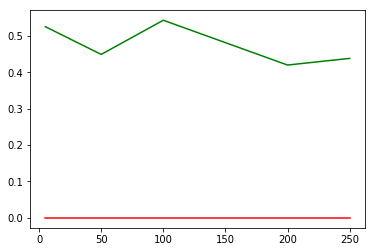

Working on... NFLX
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.

0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.6217948717948718
0.5076923076923077
0.4064748201438849
0.5163636363636364
0.5335968379446641
0.48703703703703705
--------------
0.5918803418803419
0.5184615384615384
0.4172661870503597
0.489090909090

0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5117647058823529
0.5087976539589443
0.49514563106796117
0.5297029702970297
0.48161764705882354
0.5
--------------
0.5019607843137255
0.5366568914956011
0.5226537216828478
0.48514851485148514
0.5
0.48746081504702193
--------------
0.5509803921568628
0.5205278592375366
0.5129449838187702
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.503921568627451
0.5
0.5210355987055016
0.5429042904290429
0.47794117647058826
0.5
--------------
0.5333333333333333
0.5058651026392962
0.5388349514563107
0.49834983498349833
0.4889705882352941
0.4780564263322884
--------------
0.5823529411764706
0.5777126099706745


0.5
0.5
0.5
0.5
0.5
0.514336917562724
--------------
0.4745762711864407
0.3797953964194373
0.5285714285714286
0.509641873278237
0.565843621399177
0.53584229390681
--------------
0.5033898305084745
0.44501278772378516
0.5357142857142857
0.509641873278237
0.5452674897119342
0.6881720430107527
--------------
0.5847457627118644
0.5396419437340153
0.5371428571428571
0.5303030303030303
0.5370370370370371
0.8799283154121864
--------------
0.5440677966101695
0.5588235294117647
0.18857142857142858
0.3333333333333333
0.4732510288065844
0.8476702508960573
--------------
0.5033898305084745
0.5434782608695652
0.4828571428571429
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.521505376344086
--------------
0.4711864406779661
0.3618925831202046
0.53
0.5068870523415978
0.5493827160493827
0.5376344086021505
--------------
0.511864406779661
0.4156010230179028
0.5071428571428571
0.5
0.569

0.64
0.46174863387978143
0.4808510638297872
0.5
--------------
0.5936395759717314
0.5323741007194245
0.5
0.5245901639344263
0.5212765957446809
0.8168724279835391
--------------
0.8215547703180212
0.5083932853717026
0.5013333333333333
0.6024590163934426
0.5255319148936171
0.8004115226337448
--------------
0.7985865724381626
0.6282973621103117
0.5093333333333333
0.48360655737704916
0.6468085106382979
0.8004115226337448
--------------
0.7137809187279152
0.526378896882494
0.2653333333333333
0.4057377049180328
0.4297872340425532
0.7695473251028807
--------------
0.5035335689045937
0.6426858513189448
0.496
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5300353356890459
0.5311750599520384
0.64
0.4494535519125683
0.4765957446808511
0.5
--------------
0.5812720848056537
0.5239808153477218
0.5
0.5259562841530054
0.5595744680851064
0.8127572016460906
--------------
0.784452296819788
0.48800959232613

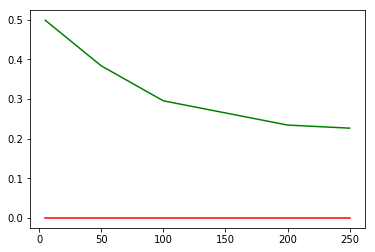

Working on... BKNG


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-

0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.3080357142857143
0.5
0.505
0.47706422018348627
0.5154639175257731
0.48863636363636365
--------------
0.5
0.5
0.5
0.4954128440366973
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.43434343434343436
0.5
0.5045871559633027
0.5
0.5
--------------
0.334

0.45145631067961167
--------------
0.33687943262411346
0.48484848484848486
0.660377358490566
0.29292929292929293
0.7816091954022989
0.529126213592233
--------------
0.39361702127659576
0.41414141414141414
0.6650943396226415
0.3333333333333333
0.6724137931034483
0.5679611650485437
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.2907801418439716
0.3686868686868687
0.6179245283018868
0.22727272727272727
0.5
0.5
--------------
0.1950354609929078
0.29292929292929293
0.6037735849056604
0.24242424242424243
0.7183908045977011
0.47572815533980584
--------------
0.425531914893617
0.6313131313131313
0.6273584905660378
0.48484848484848486
0.7873563218390804
0.49514563106796117
--------------
0.475177304964539
0.7222222222222222
0.6226415094339622
0.47474747474747475
0.8103448275862069
0.49029126213592233
--------------
0.429078014184397

0.7283950617283951
0.9653846153846154
0.5043859649122807
--------------
0.5705128205128205
0.7409638554216867
0.3826086956521739
0.7407407407407407
0.8346153846153846
0.4166666666666667
--------------
0.0
0.5120481927710844
0.5130434782608696
0.5370370370370371
0.5115384615384615
0.5087719298245614
--------------
0.0
0.5
0.5
0.5
0.5
0.5
--------------
0.0
0.5
0.5
0.5
0.5
0.5
--------------
0.0
0.5
0.5
0.5
0.5
0.5
--------------
0.21794871794871795
0.4397590361445783
0.4260869565217391
0.5
0.5
0.5
--------------
0.28846153846153844
0.5903614457831325
0.5
0.5432098765432098
0.8692307692307693
0.5526315789473685
--------------
0.9166666666666666
0.6385542168674698
0.6304347826086957
0.7530864197530864
0.95
0.5
--------------
0.8717948717948718
0.7650602409638554
0.5521739130434783
0.7160493827160493
0.7307692307692307
0.5
--------------
0.8141025641025641
0.7349397590361446
0.5217391304347826
0.6604938271604939
0.8730769230769231
0.4780701754385965
--------------
0.5641025641025641
0.7469

0.5681818181818182
0.6881720430107527
0.6973684210526315
0.7230215827338129
--------------
0.019736842105263157
0.5233644859813084
0.5318181818181819
0.5
0.039473684210526314
0.5467625899280576
--------------
0.019736842105263157
0.5
0.5
0.5
0.0
0.5
--------------
0.019736842105263157
0.5
0.5
0.5
0.0
0.5
--------------
0.019736842105263157
0.5
0.5
0.5
0.0
0.5
--------------
0.3026315789473684
0.49065420560747663
0.5545454545454546
0.5752688172043011
0.8289473684210527
0.4712230215827338
--------------
0.47368421052631576
0.5327102803738317
0.5136363636363637
0.6612903225806451
0.881578947368421
0.5971223021582733
--------------
0.881578947368421
0.5280373831775701
0.5545454545454546
0.9354838709677419
0.9605263157894737
0.7589928057553957
--------------
0.9013157894736842
0.40186915887850466
0.5045454545454545
0.9516129032258065
0.9605263157894737
0.7733812949640287
--------------
0.8355263157894737
0.3598130841121495
0.5954545454545455
0.8010752688172043
0.875
0.7194244604316546
-----

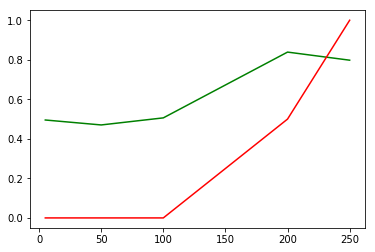

Working on... ADBE


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-

0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5656028368794326
0.4892966360856269
0.521505376344086
0.5202020202020202
0.512987012987013
0.6490196078431373
--------------
0.6134751773049646
0.4602446483180428
0.5501792114695341
0.5218855218855218
0.5211038961038961
0.6058823529411764
--------------
0.5124113475177305
0.518348623853211
0.5268817204301075
0.5168350168350169
0.49837662337662336
0.5450980392156862
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5833333333333334
0.48623853211009177
0.521505376344086
0.5151515151515151
0.5016233766233766
0.6313725490196078
--------------
0.6063829787234043

0.4785276073619632
0.5782312925170068
0.5033444816053512
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.47752808988764045
0.42484662576687116
0.5119047619047619
0.5033444816053512
0.5081699346405228
0.5015625
--------------
0.4737827715355805
0.46319018404907975
0.5289115646258503
0.5384615384615384
0.4444444444444444
0.5015625
--------------
0.4250936329588015
0.5
0.6003401360544217
0.5016722408026756
0.4526143790849673
0.5078125
--------------
0.4794007490636704
0.49846625766871167
0.6054421768707483
0.5267558528428093
0.5049019607843137
0.515625
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.4868913857677903
0.43

--------------
0.39805825242718446
0.508955223880597
0.5017123287671232
0.5
0.5013089005235603
0.569023569023569
--------------
0.4741100323624595
0.42686567164179107
0.553082191780822
0.5392441860465116
0.4895287958115183
0.563973063973064
--------------
0.4919093851132686
0.43134328358208956
0.5736301369863014
0.5813953488372093
0.4489528795811518
0.5286195286195287
--------------
0.5
0.49701492537313435
0.4982876712328767
0.502906976744186
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.47249190938511326
0.4791044776119403
0.5702054794520548
0.5058139534883721
0.5431937172774869
0.4107744107744108
--------------
0.47572815533980584
0.5
0.5
0.5
0.5
0.4292929292929293
--------------
0.4546925566343042
0.5044776119402985
0.5
0.5
0.5
0.5656565656565656
--------------
0.5760517799352751
0.4388059701492537
0.5291095890410958
0.5
0.5379581151832461
0.5252525252525253
--------------
0.5032362459546

0.5267605633802817
0.6041666666666666
0.5391156462585034
--------------
0.49846625766871167
0.31197771587743733
0.6258278145695364
0.5126760563380282
0.5763888888888888
0.5221088435374149
--------------
0.5030674846625767
0.4275766016713092
0.6390728476821192
0.6070422535211267
0.55
0.5221088435374149
--------------
0.5
0.4972144846796657
0.49834437086092714
0.5028169014084507
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5138036809815951
0.5
0.5
0.5
0.5
0.5425170068027211
--------------
0.5230061349693251
0.4777158774373259
0.5198675496688742
0.5112676056338028
0.5180555555555556
0.7074829931972789
--------------
0.6012269938650306
0.3871866295264624
0.5645695364238411
0.5253521126760563
0.5833333333333334
0.6139455782312925
--------------
0.5184049079754601
0.34540389972144847
0.5943708609271523
0.528169014084507
0.6319444444444444
0.532312925170068
--------------
0.4938650306748466
0.3802

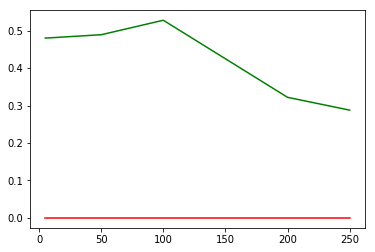

Working on... AMGN
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.

0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.4288194444444444
0.45229007633587787
0.5
0.574
0.5622641509433962
0.5141700404858299
--------------
0.4722222222222222
0.43702290076335876
0.5293040293040293
0.562
0.47358490566037736
0.5242914979757085
--------------
0.4982638888888889
0.5038167938931297
0.5018315018315018
0.5
0.5226415094339623
0.5121457489878543
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5

0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.515358361774744
0.5227272727272727
0.4209621993127148
0.4812734082397004
0.47115384615384615
0.5037593984962406
--------------
0.5443686006825939
0.44405594405594406
0.5085910652920962
0.5936329588014981
0.47692307692307695
0.5789473684210527
--------------
0.5426621160409556
0.46853146853146854
0.4381443298969072
0.5543071161048689
0.5038461538461538
0.5902255639097744
--------------
0.5358361774744027
0.47202797202797203
0.34192439862542956
0.5337078651685393
0.5576923076923077
0.5413533834586466
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5460750853242321
0.5209790209790209
0.4209621993127148
0.4887640449438202
0.43846153846153846
0.6672932

0.555858310626703
0.5045454545454545
0.5196078431372549
0.5705128205128205
0.5051546391752577
0.5920502092050209
--------------
0.5081743869209809
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.3787465940054496
0.3878787878787879
0.5
0.6987179487179487
0.5017182130584192
0.606694560669456
--------------
0.5245231607629428
0.42727272727272725
0.5137254901960784
0.6346153846153846
0.5137457044673539
0.694560669456067
--------------
0.5694822888283378
0.44393939393939397
0.5294117647058824
0.5833333333333334
0.5274914089347079
0.6924686192468619
--------------
0.6185286103542235
0.5636363636363636
0.48627450980392156
0.594551282051282
0.5051546391752577
0.6757322175732218
--------------
0.5626702997275205
0.543939393939394
0.4823529411764706
0.5849358974358975
0.5567010309278351
0.5711297071129707
--------------
0.5
0.4803030303030303
0.50588235

0.5962643678160919
0.7110778443113772
0.5301724137931034
0.49348534201954397
0.5283018867924528
0.731404958677686
--------------
0.5445402298850575
0.5988023952095808
0.5021551724137931
0.5146579804560261
0.5169811320754717
0.5351239669421488
--------------
0.5
0.5044910179640718
0.5237068965517241
0.50814332247557
0.5094339622641509
0.5495867768595041
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.3017241379310345
0.41467065868263475
0.6637931034482759
0.5
0.4962264150943396
0.6074380165289256
--------------
0.5086206896551724
0.5044910179640718
0.5086206896551724
0.5537459283387622
0.5
0.7706611570247934
--------------
0.5272988505747126
0.531437125748503
0.5172413793103449
0.5
0.49245283018867925
0.75
--------------
0.5445402298850575
0.624251497005988
0.5581896551724138
0.4576547231270358
0.49056603773584906
0.7871900826446281
--------------
0.5747126436781609
0.655688622754491
0.5129310344827587

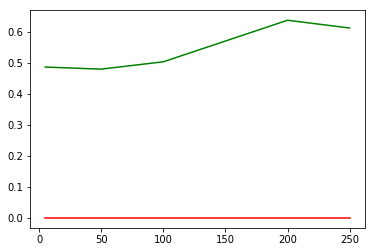

Working on... TXN


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
--------------
0.5
0.5
0.5
0.5
0.5
0.5
-

KeyboardInterrupt: 

In [4]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[5,50,100,200,250]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g,class_weight='balanced')
                    #x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                        
                    print(rbf_svm.score(x_val,y_val))
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                print('--------------')
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        
        rbf_svm=svm.SVC(kernel='rbf',C=maxc,gamma=maxg,class_weight='balanced')
        #x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [ ]:
print(accstocksresults)

In [ ]:
tempacc=accstocksresults

In [ ]:
print(len(tempacc))

In [ ]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,17):
    t=np.add(t,tempacc[i])
print(t)
print(t/17)

In [ ]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
        if(tempacc[i][k]<0.5):
           tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    if(i=)
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()


In [ ]:
meanvalue=[]
for i in range(0,len(tempacc)):
    meanvalue.append(np.mean(tempacc[i]))
top10=np.argsort(meanvalue)[-20:]
for i in range(0,len(top10)):
    print(files[top10[i]])
    print(tempacc[top10[i]])
    print(meanvalue[top10[i]])
    plt.plot(prices[top10[i]].iloc[3600:]['close'])
    plt.show()

In [ ]:
aapl=[0.5186335403726708, 0.5287713841368584, 0.5132192846034215, 0.5031152647975078, 0.49765990639625585, 0.5211267605633803, 0.5313479623824452, 0.5361635220125787, 0.5165876777251185, 0.4960380348652932, 0.49760765550239233, 0.5064102564102564, 0.5048231511254019, 0.5040387722132472, 0.4512987012987013, 0.3888888888888889, 0.3957307060755337, 0.4405940594059406, 0.47761194029850745, 0.49166666666666664, 0.6, 0.5912162162162162, 0.559931506849315, 0.5888501742160279, 0.5390070921985816]
adbe=[0.5498575498575499, 0.5698005698005698, 0.5783475783475783, 0.609129814550642, 0.6442857142857142, 0.6575931232091691, 0.6752873563218391, 0.6772334293948127, 0.6734104046242775, 0.6652173913043479, 0.6802919708029197, 0.6881405563689604, 0.7147058823529412, 0.7684365781710915, 0.7911111111111111, 0.8002980625931445, 0.7754491017964071, 0.7894736842105263, 0.8187311178247734, 0.8634294385432474, 0.8929663608562691, 0.9139784946236559, 0.9891135303265941, 0.9936808846761453, 1.0]
adi=[0.51994301994302, 0.5327635327635327, 0.550641940085592, 0.5428571428571428, 0.5436337625178826, 0.5415472779369628, 0.5502873563218391, 0.5778097982708934, 0.6034732272069464, 0.5892597968069666, 0.5883211678832116, 0.5791788856304986, 0.5441176470588235, 0.518463810930576, 0.46735905044510384, 0.45671641791044776, 0.4587706146926537, 0.4879518072289157, 0.5128593040847201, 0.5486322188449848, 0.4946401225114854, 0.5261538461538462, 0.5514018691588785, 0.7215189873417721, 0.6270096463022508]
googl=[0.5014245014245015, 0.5213675213675214, 0.5292439372325249, 0.5378031383737518, 0.5665236051502146, 0.5702005730659025, 0.5933908045977011, 0.6123919308357348, 0.5745296671490593, 0.5761973875181422, 0.6262773722627737, 0.6310395314787701, 0.5985294117647059, 0.5634218289085545, 0.5170370370370371, 0.47242921013412814, 0.48353293413173654, 0.48270676691729325, 0.49244712990936557, 0.496206373292868, 0.4954128440366973, 0.5407066052227343, 0.671850699844479, 0.6524486571879937, 0.6725521669341894]
results=np.add(aapl,adbe)
results=np.add(results,adi)
results=np.add(results,googl)
tot=results/4

print(tot)
plt.plot(trendwindowtime,tot)
plt.show()

In [ ]:
#THE CELL BELOW IS ONLY THE OLDER CV METHOD WITH 2 ERRORS:
#1 NOT AVG ON THE CV BUT ONLY BEST  
#2 OVERLAPPING VALIDATION PART BETWEEN DIFFERENT FOLDS

In [ ]:
o=0
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[2,6,16,32,56,86,100,125,160,190,220,260,300,350,400]
    f1total=[]
    acctotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            y.append(np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        y=(y+1)//2
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.logspace(-2,4,5)
        gspace=np.logspace(-4,4,5)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        for c in cspace:
            #print()
            for g in gspace:
                cvacc=0
                #faccio cross validation
                nfold=30
                dimfolf=(len(x_tv))//nfold
                # -1 so the last fold is bigger ex 100/8=12,5 last fold from 11 to 12,5
                first=math.floor(nfold*0.7)
                for i in range(first,nfold):
                    #print('Fold:',i)
                    if(i==nfold-1):
                        xdataToPass=x_tv
                        ydataToPass = y_tv
                        cvpart=0.8
                        cv=math.ceil(len(xdataToPass)*cvpart)
                        x_train=xdataToPass[0:cv]
                        y_train=ydataToPass[0:cv]
                        x_val=xdataToPass[cv:]
                        y_val=ydataToPass[cv:]

                    else:
                        #prendo il giusto fold
                        xdataToPass=x_tv[0:dimfolf*i]
                        ydataToPass = y_tv[0:dimfolf * i]
                        #divido in train and val
                        cvpart=0.8
                        cv=math.ceil(len(xdataToPass)*cvpart)
                        x_train=xdataToPass[0:cv]
                        y_train=ydataToPass[0:cv]
                        x_val=xdataToPass[cv:]
                        y_val=ydataToPass[cv:]
                        
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    rbf_svm.fit(x_train,y_train)
                    prediction=rbf_svm.predict(x_val)
                    cvacc=f1_score(y_val,prediction)    
                    if(cvacc>maxacc):
                        #print(cvacc)
                        maxacc=cvacc
                        maxg=g
                        maxc=c
                        bestsvm=rbf_svm

        #print('ACCURACY on val:',maxacc)
        rbf_svm=svm.SVC(kernel='rbf',C=maxc,gamma=maxg)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        CM = f1_score(y_test, prediction)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        #print('F1,score',CM)
        #print('Accuracy:',valueacc)
        f1total.append(CM)
        acctotal.append(valueacc)
    
    print(f1total)
    print(acctotal)
    print('accuracy')
    plt.plot(trendwindowtime,acctotal)
    plt.show()
    print('f1score')
    plt.plot(trendwindowtime,f1total)
    plt.show()
    

In [ ]:
plt.plot(trendwindowtime,acctotal)
plt.plot(trendwindowtime,f1total)
